<a href="https://colab.research.google.com/github/valearizag/Introduccion_PySpark/blob/main/Introducci%C3%B3n_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

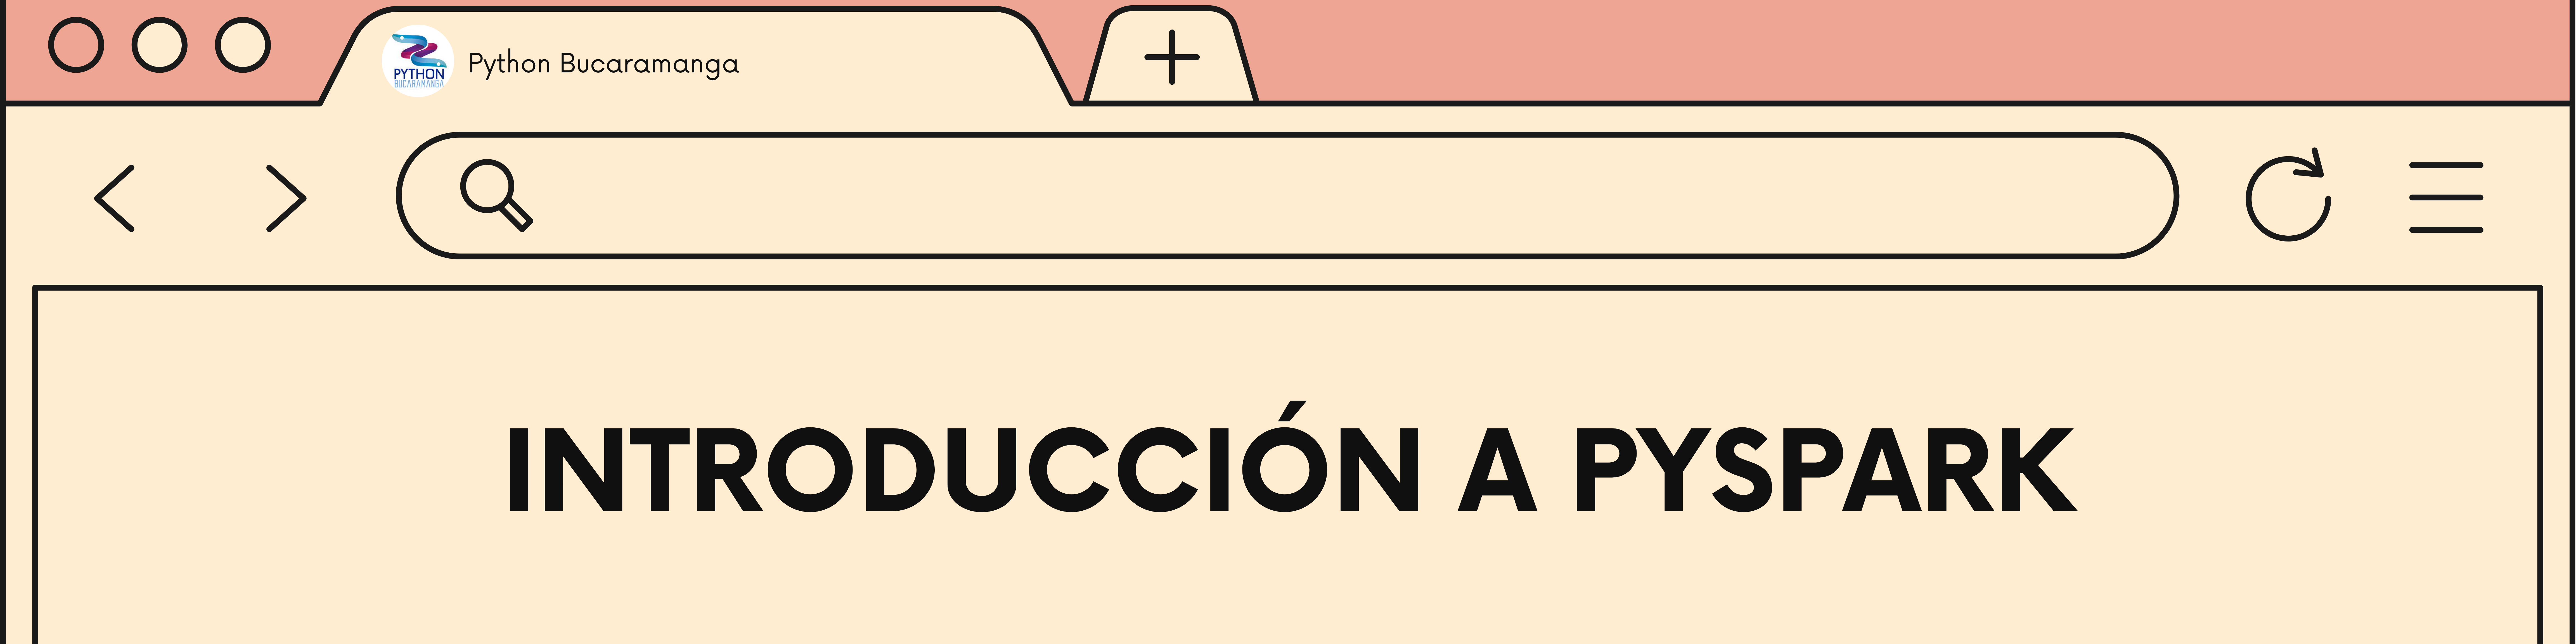

In [2]:
from IPython.display import Image
Image(filename='Banners.png')

#**Instalar librerías**

In [4]:
# Instalar librerias
!pip install pyspark
!pip install -q kaggle

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 48.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=ab40fbd0faca11f5e231b0b1786f6f2bd1d647dd7ae6bed8e8ddd6fd3d3fee8b
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


# **Importar librerías**

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import zipfile
import os
import pandas as pd

# **Creación de una sesión con Spark**

In [ ]:
#Iniciar conexión de spark
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

# **Conexión con kaggle para descargar los datos**
Para descargar datos desde Kaggle es necesario crear un token de acceso. Para esto debes seguir los siguientes pasos:

1.   Ingresa a tu perfil de kaggle
2.   Seleccionar *Account* y bajar hasta la opción *API*
3.   Dar click en *Create New API Token* y se descargará un archivo JSON con   tus credenciales
4.   Subir el archivo JSON a Colab Notebook


In [5]:
# Creamos carpeta oculta en ambiente de linux sobre colab
!mkdir ~/.kaggle

In [ ]:
# Copiar el archivo JSON  a la carpeta oculta que creamos
!cp kaggle.json ~/.kaggle/

In [ ]:
# Cambiamos los permisos para permitir lectura de las credenciales
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Descargamos archivos indicando el usuario del propietario de los datos en kaggle y el nombre de dataset
! kaggle datasets download arevel/chess-games --force

 99% 1.43G/1.45G [00:12<00:00, 86.6MB/s]
100% 1.45G/1.45G [00:12<00:00, 124MB/s] 


In [ ]:
# Descomprimir el archivo
for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

# **Lectura de datos**

## Lectura de datos con Pandas

In [ ]:
df_pandas =pd.read_csv('/content/chess_games.csv')

## Lectura datos con PySpark

In [ ]:
df = spark.read.csv('/content/chess_games.csv', header=True)

In [ ]:
# Guardar el dataset en Drive
!cp chess_games.csv "/content/drive/MyDrive/(datasets)"

# **Procesamiento de datos**

## Número de filas y columnas

pandas: 

```
df.shape
```



In [ ]:
print((df.count(), len(df.columns)))

(6256184, 15)


## Ver una muestra de los datos

pandas: 

```
df.head()
```

In [ ]:
df.show()

+------------------+---------------+---------------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+--------------------+
|             Event|          White|          Black|Result|   UTCDate| UTCTime|WhiteElo|BlackElo|WhiteRatingDiff|BlackRatingDiff|ECO|             Opening|TimeControl| Termination|                  AN|
+------------------+---------------+---------------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+--------------------+
|        Classical |        eisaaaa|       HAMID449|   1-0|2016.06.30|22:00:01|    1901|    1896|           11.0|          -11.0|D10|        Slav Defense|      300+5|Time forfeit|1. d4 d5 2. c4 c6...|
|            Blitz |         go4jas|     Sergei1973|   0-1|2016.06.30|22:00:01|    1641|    1627|          -11.0|           12.0|C20|King's Pawn Openi...|      300+0|      Normal|1. e4 e5 2. b3 Nf

## Esquema de los datos

pandas: 

```
df.info()
```

In [ ]:
df.printSchema()

root
 |-- Event: string (nullable = true)
 |-- White: string (nullable = true)
 |-- Black: string (nullable = true)
 |-- Result: string (nullable = true)
 |-- UTCDate: string (nullable = true)
 |-- UTCTime: string (nullable = true)
 |-- WhiteElo: string (nullable = true)
 |-- BlackElo: string (nullable = true)
 |-- WhiteRatingDiff: string (nullable = true)
 |-- BlackRatingDiff: string (nullable = true)
 |-- ECO: string (nullable = true)
 |-- Opening: string (nullable = true)
 |-- TimeControl: string (nullable = true)
 |-- Termination: string (nullable = true)
 |-- AN: string (nullable = true)



## Estadística descriptiva 

pandas: 

```
df.describe()
```

In [ ]:
df.describe().show()

+-------+--------------------+--------------------+--------------------+-------+----------+--------+------------------+-----------------+------------------+--------------------+-------+--------------------+-----------+------------+--------------------+
|summary|               Event|               White|               Black| Result|   UTCDate| UTCTime|          WhiteElo|         BlackElo|   WhiteRatingDiff|     BlackRatingDiff|    ECO|             Opening|TimeControl| Termination|                  AN|
+-------+--------------------+--------------------+--------------------+-------+----------+--------+------------------+-----------------+------------------+--------------------+-------+--------------------+-----------+------------+--------------------+
|  count|             6256184|             6256184|             6256184|6256184|   6256184| 6256184|           6256184|          6256184|           6251516|             6251516|6256184|             6256184|    6256184|     6256184|          

## Filtrar el dataset 

pandas: 

```
df[df['Event']=='Classical']
```

In [ ]:
df.filter(df.Event == "Classical ").show()

+----------+---------------+----------------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+--------------------+
|     Event|          White|           Black|Result|   UTCDate| UTCTime|WhiteElo|BlackElo|WhiteRatingDiff|BlackRatingDiff|ECO|             Opening|TimeControl| Termination|                  AN|
+----------+---------------+----------------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+--------------------+
|Classical |          Rokki|     solibalsara|   0-1|2016.07.02|23:16:20|    1868|    2123|           -4.0|            5.0|D08|Queen's Gambit Re...|     780+12|Time forfeit|1. d4 d5 2. c4 e5...|
|Classical |  DieAffeninsel|          AtitDJ|   0-1|2016.07.05|11:40:16|    1415|    1610|           -5.0|            6.0|A07|King's Indian Attack|     1200+0|      Normal|1. Nf3 d5 2. g3 N...|
|Classical |         Firhad|  

## Ordenar el dataset
pandas: 

```
df.sort_values(by=['UTCDate'], ascending=False)
```

In [ ]:
df.sort(F.col("UTCDate").desc()).show(10)

+--------------------+-------------+-------------------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+--------------------+
|               Event|        White|              Black|Result|   UTCDate| UTCTime|WhiteElo|BlackElo|WhiteRatingDiff|BlackRatingDiff|ECO|             Opening|TimeControl| Termination|                  AN|
+--------------------+-------------+-------------------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+--------------------+
|   Blitz tournament |       iyei15|             SJ1992|   0-1|2016.07.31|00:00:03|    1288|    1449|           -7.0|            6.0|B30|Sicilian Defense:...|      180+0|Time forfeit|1. e4 { [%eval 0....|
| Classical tourna...|   Cullarvega|     Vlctor3million|   1-0|2016.07.31|00:00:03|    1753|    1727|           11.0|          -11.0|A44|  Old Benoni Defense|      600+0|      Norm

## Eliminar una columna:

pandas: 

```
df.drop(columns=['AN'], inplace=True)
```

In [ ]:
df = df.drop("AN")
df.show(10)

+------------------+---------------+---------------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+
|             Event|          White|          Black|Result|   UTCDate| UTCTime|WhiteElo|BlackElo|WhiteRatingDiff|BlackRatingDiff|ECO|             Opening|TimeControl| Termination|
+------------------+---------------+---------------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+
|        Classical |        eisaaaa|       HAMID449|   1-0|2016.06.30|22:00:01|    1901|    1896|           11.0|          -11.0|D10|        Slav Defense|      300+5|Time forfeit|
|            Blitz |         go4jas|     Sergei1973|   0-1|2016.06.30|22:00:01|    1641|    1627|          -11.0|           12.0|C20|King's Pawn Openi...|      300+0|      Normal|
| Blitz tournament |Evangelistaizac|         kafune|   1-0|2016.06.30|22:00:02|    1647|    1688|   

## Eliminar datos nulos:

pandas: 

```
df.dropna(inplace=True)
```

In [ ]:
df = df.na.drop()
df.show()

+------------------+---------------+---------------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+
|             Event|          White|          Black|Result|   UTCDate| UTCTime|WhiteElo|BlackElo|WhiteRatingDiff|BlackRatingDiff|ECO|             Opening|TimeControl| Termination|
+------------------+---------------+---------------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+
|        Classical |        eisaaaa|       HAMID449|   1-0|2016.06.30|22:00:01|    1901|    1896|           11.0|          -11.0|D10|        Slav Defense|      300+5|Time forfeit|
|            Blitz |         go4jas|     Sergei1973|   0-1|2016.06.30|22:00:01|    1641|    1627|          -11.0|           12.0|C20|King's Pawn Openi...|      300+0|      Normal|
| Blitz tournament |Evangelistaizac|         kafune|   1-0|2016.06.30|22:00:02|    1647|    1688|   

## Convertir datos a DataFrame de Pandas:

In [ ]:
df_Pandas = df.select("Event", "White", "Black", "Result").limit(50).toPandas()

In [ ]:
df_Pandas.head()

In [ ]:
df_Pandas.shape

(50, 4)

## UDF

Los UDF de Pyspark son similares a los métodos .map () y .apply () de pandas 'series y dataframes'.

Eliminar espacios en un string:

In [ ]:
UDF_python = F.udf(lambda s: s.replace(" ", ""), StringType())
df = df.withColumn("Event", UDF_python("Event"))

## Agrupar datos

pandas: 

```
df.groupby('Event').count()
```

In [ ]:
df_group = df.groupBy('Event').count()
df_group.show()

+-------------------+-------+
|              Event|  count|
+-------------------+-------+
|             Bullet|1198185|
|    Blitztournament| 472262|
|              Blitz|2339574|
|          Classical|1510811|
|   Bullettournament| 546777|
|Classicaltournament| 165635|
|     Correspondence|  22940|
+-------------------+-------+



## Cambiar tipo de dato de una columna

pandas: 

```
df['Date] = pd.to_datetime(df['UTCDate'], format="%Y/%m/%d")
```

In [ ]:
df = df.withColumn("Date", F.to_date(F.col("UTCDate"),"yyyy.MM.dd"))
df.printSchema()

root
 |-- Event: string (nullable = true)
 |-- White: string (nullable = true)
 |-- Black: string (nullable = true)
 |-- Result: string (nullable = true)
 |-- UTCDate: string (nullable = true)
 |-- UTCTime: string (nullable = true)
 |-- WhiteElo: string (nullable = true)
 |-- BlackElo: string (nullable = true)
 |-- WhiteRatingDiff: string (nullable = true)
 |-- BlackRatingDiff: string (nullable = true)
 |-- ECO: string (nullable = true)
 |-- Opening: string (nullable = true)
 |-- TimeControl: string (nullable = true)
 |-- Termination: string (nullable = true)
 |-- AN: string (nullable = true)
 |-- Date: date (nullable = true)



## Renombrar una columna

pandas: 

```
df.rename(columns={'Opening Type':'Opening}, inplace=True)
```

In [ ]:
df = df.withColumnRenamed("Opening", "Opening Type")

In [ ]:
df.show(3)

+---------------+---------------+----------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+--------------------+----------+
|          Event|          White|     Black|Result|   UTCDate| UTCTime|WhiteElo|BlackElo|WhiteRatingDiff|BlackRatingDiff|ECO|        Opening Type|TimeControl| Termination|                  AN|      Date|
+---------------+---------------+----------+------+----------+--------+--------+--------+---------------+---------------+---+--------------------+-----------+------------+--------------------+----------+
|      Classical|        eisaaaa|  HAMID449|   1-0|2016.06.30|22:00:01|    1901|    1896|           11.0|          -11.0|D10|        Slav Defense|      300+5|Time forfeit|1. d4 d5 2. c4 c6...|2016-06-30|
|          Blitz|         go4jas|Sergei1973|   0-1|2016.06.30|22:00:01|    1641|    1627|          -11.0|           12.0|C20|King's Pawn Openi...|      300+0|      Normal|1. e4 e5 2. b

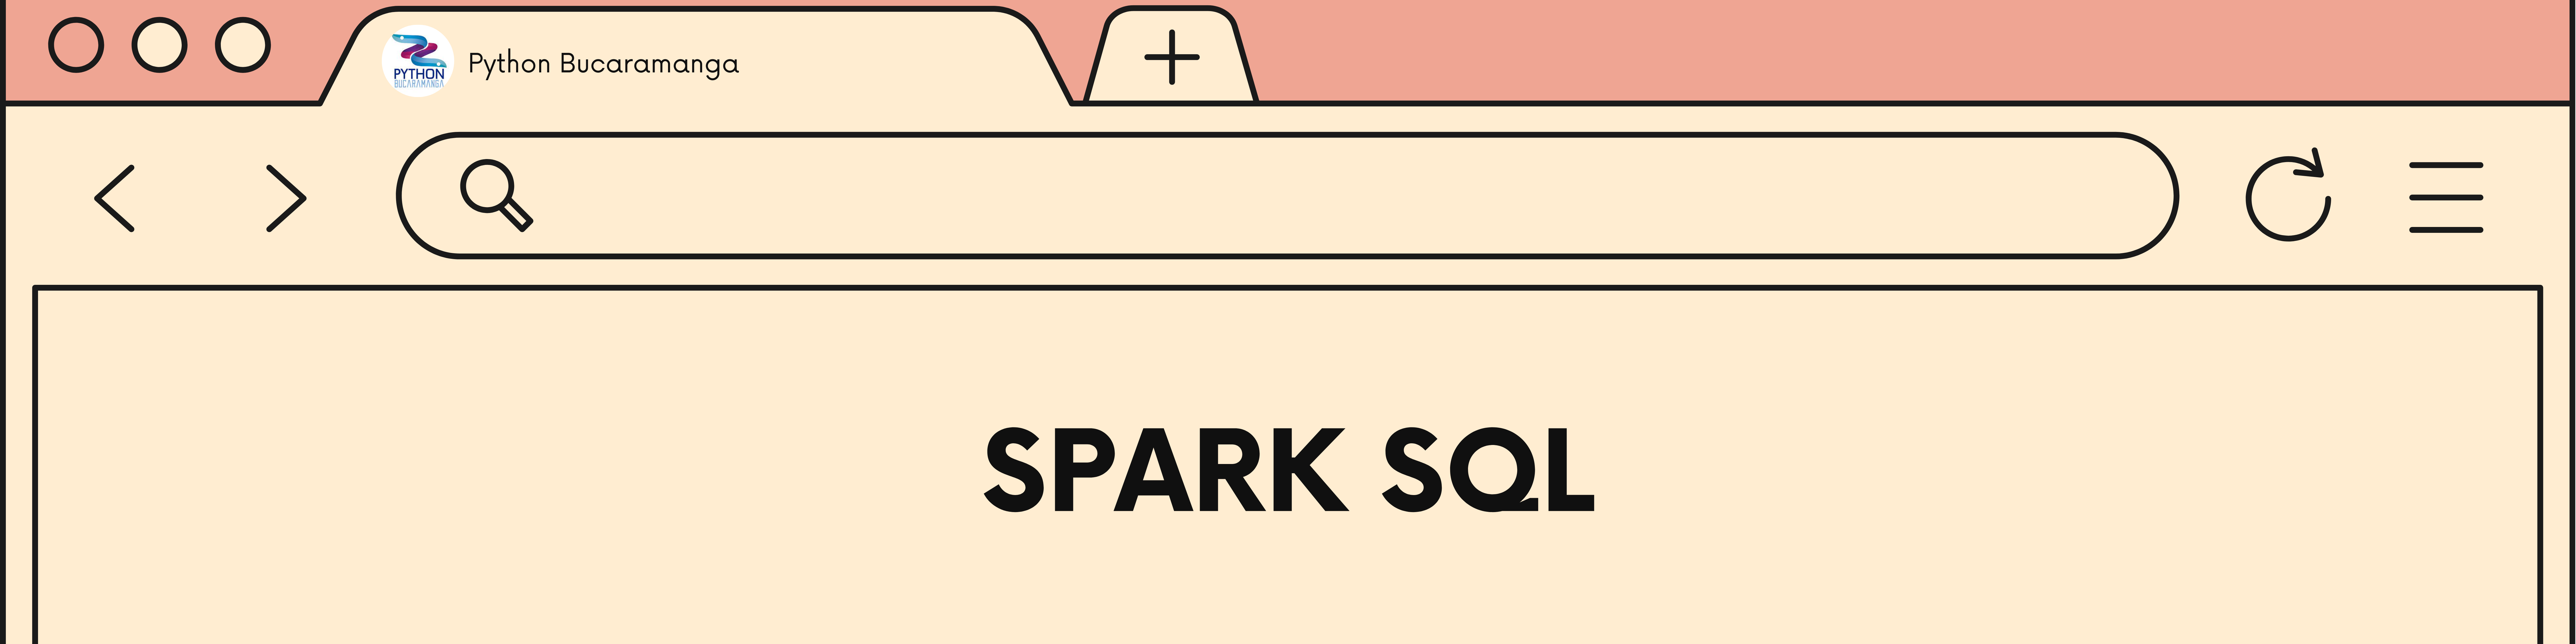

In [3]:
Image(filename='sql.png')

# **Spark SQL en Python**

## Creación de vista del dataframe

In [ ]:
df.createOrReplaceTempView("chess_games")

## Muestra de los datos

In [ ]:
spark.sql("SELECT COUNT(*) FROM chess_games").show()

+--------+
|count(1)|
+--------+
| 6256184|
+--------+



## Valores únicos de una columna

In [ ]:
spark.sql("SELECT DISTINCT Result FROM chess_games").show()

+-------+
| Result|
+-------+
|1/2-1/2|
|    1-0|
|    0-1|
|      *|
+-------+



## Crear nueva columna

In [ ]:
spark.sql("SELECT Event, White, Black, Result, CASE WHEN Result = '1/2-1/2' THEN 'Empate' WHEN Result = '1-0' THEN 'White wins' WHEN Result = '0-1' THEN 'Black wins' ELSE 'NA' END AS definitive_results FROM chess_games").show()

+---------------+---------------+---------------+------+------------------+
|          Event|          White|          Black|Result|definitive_results|
+---------------+---------------+---------------+------+------------------+
|      Classical|        eisaaaa|       HAMID449|   1-0|        White wins|
|          Blitz|         go4jas|     Sergei1973|   0-1|        Black wins|
|Blitztournament|Evangelistaizac|         kafune|   1-0|        White wins|
| Correspondence|         Jvayne|       Wsjvayne|   1-0|        White wins|
|Blitztournament|         kyoday|      BrettDale|   0-1|        Black wins|
|Blitztournament| lucaseixasouza|         diguim|   0-1|        Black wins|
|Blitztournament|       RENZZO77|HeadlessChicken|   0-1|        Black wins|
|Blitztournament|          ipero|      Bayern123|   1-0|        White wins|
|Blitztournament|Loginov19510410|        Kereshu|   0-1|        Black wins|
|Blitztournament|     Shambobala|     cernunnoss|   1-0|        White wins|
|      Class

## Calculos de una columna

In [ ]:
spark.sql("SELECT AVG(WhiteELO) as avg_white_elo, AVG(BlackELO) as avg_black_elo  FROM chess_games").show()

+------------------+-----------------+
|     avg_white_elo|    avg_black_elo|
+------------------+-----------------+
|1741.9453049974234|1740.390282638746|
+------------------+-----------------+



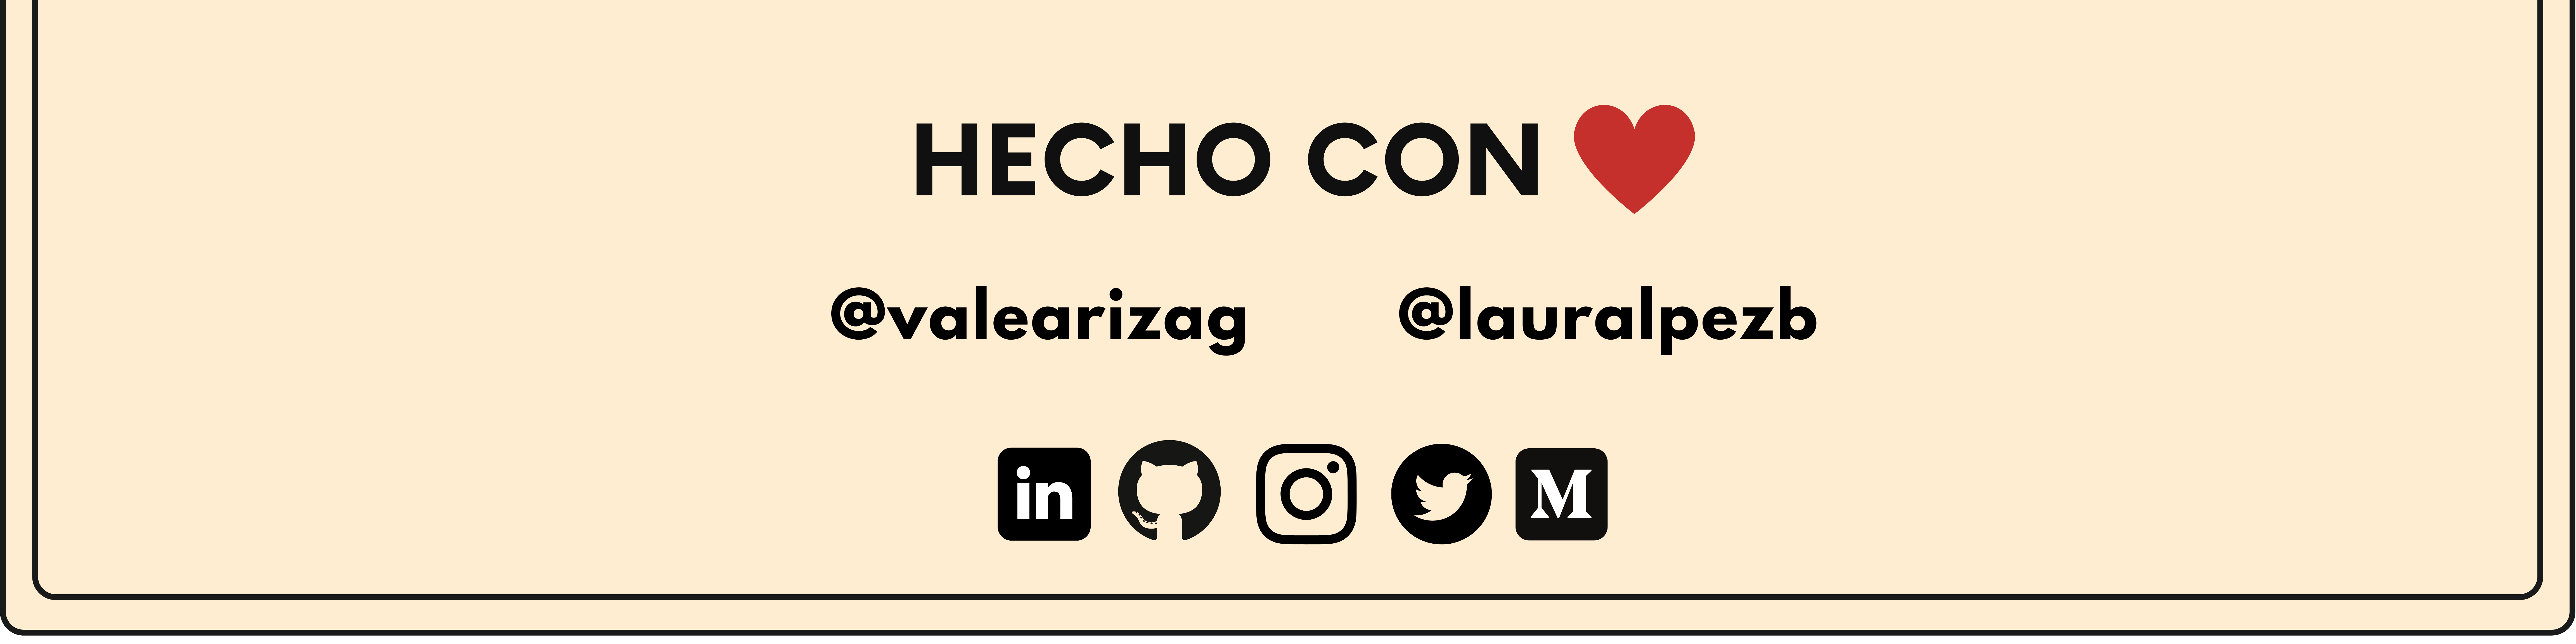

In [8]:
Image(filename='Banners (2).png')